# To do

- Plot daytype based on day order
<br>
<br>
<br>

# Oyster card data analysis and visualization

### Goal

Origin and destination analysis and visualization of Transport for London (TfL) tube journeys based on districts of Greater London

<br>

### Data sets

#### Oyster card journey

Available for download at: https://api-portal.tfl.gov.uk/docs

This data set provides a 5% sample of all Oyster card journeys performed in a week during November 2009 on bus, Tube, DLR and London Overground.

Column descriptions
(Source: http://data.london.gov.uk/dataset/oyster-card-journey-information)
- downo - a number between 1 and 7, 1 being Sunday, 2 being Monday etc
- daytype - Sun to Sat
- SubSystem - the mode(s) of the journey. LUL - London Underground, NR - National Rail, LTB - London Buses, DLR- Docklands Light Railway, LRC - London Overground, TRAM - Croydon Tram
- StartStn - Station the journey started at
- EndStation - Station the journey ended at
- EntTime - Entry time of the journey in minutes after midnight
- EntTimeHHMM - Entry time in HH:MM text format
- ExTime - Exit time of the journey in minutes after midnight
- EXTimeHHMM - Exit time in HH:MM text format
- ZVPPT - zones of Oyster Season ticket, if used
- JNYTYP - Product types involved in the journey. PPY - Pure PAYG, TKT - Pure Oyster Season, MIXED - Combined PAYG and Oyster Season
- DailyCapping - it shows as Y when PAYG journey was capped
- FFare - Full PAYG Fare before any discounts
- Dfare - PAYG Fare after usage based discounts
- RouteID - The Route Number of the Bus, if a Bus has been boarded
- FinalProduct - Combined Product Description used for journey


#### TfL station locaitons

Available for download at: https://api-portal.tfl.gov.uk/docs

This data set is a geo-coded KML feed of most London Underground, DLR and London Overground stations.


#### Districts of Greater London

Available for download at: https://data.gov.uk/dataset/county-and-unitary-authority-december-2015-full-extent-boundaries-in-england-and-wales/resource/cf40a4f7-3686-4818-b0ea-79e8b259ea16

This data set contains digital vector boundaries for counties, metropolitan districts, London boroughs and unitary authorities in England and Wales as at December 2015.

### Oyster card data - exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("data/Nov09JnyExport.csv", na_values = ["NA"])

In [2]:
data.head()

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct
0,3,Tue,LUL,Unstarted,Kings Cross M,0,00:00,633,10:33,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day
1,4,Wed,LUL,Unstarted,Sudbury Hill,0,00:00,447,07:27,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
2,3,Tue,NR,Unstarted,Richmond,0,00:00,966,16:06,Z0304,TKT,N,0,0,XX,LUL Travelcard-7 Day
3,4,Wed,NR,Unstarted,Romford,0,00:00,657,10:57,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
4,6,Fri,NR,Unstarted,Norwood Junction SR,0,00:00,450,07:30,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day


In [3]:
data.tail()

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct
2623482,7,Sat,TRAM,GEORGE STRT TRAM,Wimbledon,999,16:39,1025,17:05,-------,PPY,N,0,0,XX,PAYG
2623483,3,Tue,LUL,Wood Lane,Baker Street,999,16:39,1019,16:59,Z0102,TKT,N,0,0,XX,LUL Travelcard-1 Month
2623484,6,Fri,LUL,Tottenham Court Rd,Oval,999,16:39,1016,16:56,-------,PPY,N,220,220,XX,PAYG
2623485,7,Sat,LTB,Bus,Bus,999,16:39,0,00:00,Z0203,TKT,N,0,0,262,LUL Travelcard-7 Day
2623486,6,Fri,LTB,Bus,Bus,999,16:39,0,00:00,B0104,TKT,N,0,0,55,Bus & Tram Pass (Child Free)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623487 entries, 0 to 2623486
Data columns (total 16 columns):
downo           int64
daytype         object
SubSystem       object
StartStn        object
EndStation      object
EntTime         int64
EntTimeHHMM     object
ExTime          int64
EXTimeHHMM      object
ZVPPT           object
JNYTYP          object
DailyCapping    object
FFare           int64
DFare           int64
RouteID         object
FinalProduct    object
dtypes: int64(5), object(11)
memory usage: 320.2+ MB


In [5]:
data["daytype"].value_counts()

Fri    435228
Wed    433256
Thu    432006
Tue    423203
Mon    416170
Sat    304030
Sun    179594
Name: daytype, dtype: int64

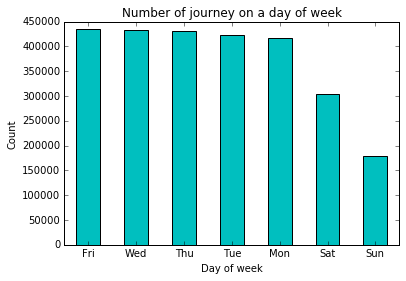

In [6]:
data["daytype"].value_counts().plot.bar(color="c")

# # user = pd.Series(count, feature)
# # user.plot.barh(figsize=(8, 4), color="c")

weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
mapping = {day: i for i, day in enumerate(weekdays)}

# key = df["day"].map(mapping)
# df.iloc[key.argsort()]

plt.xlabel("Day of week")
plt.ylabel("Count")
plt.title("Number of journey on a day of week")
plt.xticks(rotation=0)
plt.show()

In [7]:
data["SubSystem"].value_counts()

LTB           1768080
LUL            723126
NR              47715
LUL/NR          25990
LUL/DLR         13911
TRAM             9583
DLR              9224
LUL/NR/LRC       8262
NR/LRC           6665
LRC              3713
LUL/LRC          3293
LUL/NR/DLR       2812
HEX               760
NR/DLR            263
LUL/TRAM           86
DLR/LRC             4
Name: SubSystem, dtype: int64

In [8]:
data["StartStn"].value_counts()

Bus                               1768080
Unstarted                           45994
Oxford Circus                       18372
Victoria                            16968
London Bridge                       16695
Liverpool Street                    15864
Canary Wharf                        12149
Stratford                           11531
Kings Cross T                       10544
Bond Street                         10530
Tottenham Court Rd                  10284
Bank                                 9521
Holborn                              9350
Piccadilly Circus                    9214
Hammersmith D                        9208
Leicester Square                     9072
Waterloo                             8494
South Kensington                     8415
Green Park                           7854
Baker Street                         7545
Brixton                              7382
Paddington                           7280
Shepherd's Bush Und                  6749
Earls Court                       

In [9]:
data["EndStation"].value_counts()

Bus                    1768080
Unfinished               35138
Oxford Circus            21652
Victoria                 18346
London Bridge            16184
Liverpool Street         14803
Canary Wharf             12177
Kings Cross T            11173
Stratford                11077
Tottenham Court Rd       11027
Bond Street              10703
Holborn                  10277
Piccadilly Circus         9669
Leicester Square          9291
Waterloo                  9129
Not Applicable            8951
Green Park                8938
Bank                      8862
Hammersmith D             8747
South Kensington          8379
Baker Street              7547
Paddington                6954
Moorgate                  6705
Brixton                   6644
Wimbledon                 6631
Shepherd's Bush Und       6502
Ealing Broadway           6499
Old Street                6484
Earls Court               6433
Euston                    6301
                        ...   
Harringay Green Las        101
Leytonst

In [10]:
data["DailyCapping"].value_counts()

N    2536287
Y      87200
Name: DailyCapping, dtype: int64

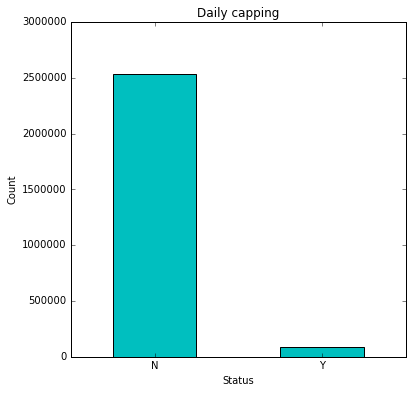

In [11]:
data["DailyCapping"].value_counts().plot.bar(figsize=(6, 6), color="c")

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Daily capping")
plt.xticks(rotation=0)
plt.show()

In [12]:
data["FinalProduct"].value_counts()

PAYG                                        915505
LUL Travelcard-7 Day                        392508
Bus & Tram Pass-7 Day                       328320
Freedom Pass (Elderly)                      256603
LUL Travelcard-1 Month                      247658
Bus & Tram Pass (Child Free)                132099
Bus & Tram Pass-1 Month                      97880
LUL Travelcard-Annual                        75167
Freedom Pass (Disabled)                      73260
Bus & Tram Pass - B&T Discount-7 Day         32818
LUL Travelcard-Time Not Captured             25787
Staff Pass - Bus Operator Nominee            10173
LUL Travelcard-Period                         9500
Staff Pass - Staff Nominee                    7067
Staff Pass - Bus Operator                     5698
Bus & Tram Pass-Annual                        4883
Bus & Tram Pass - B&T Discount-1 Month        3771
Staff Pass - Staff Retired including LCB      2377
LUL Travelcard->Annual                        1236
Tfl Travel - Free              

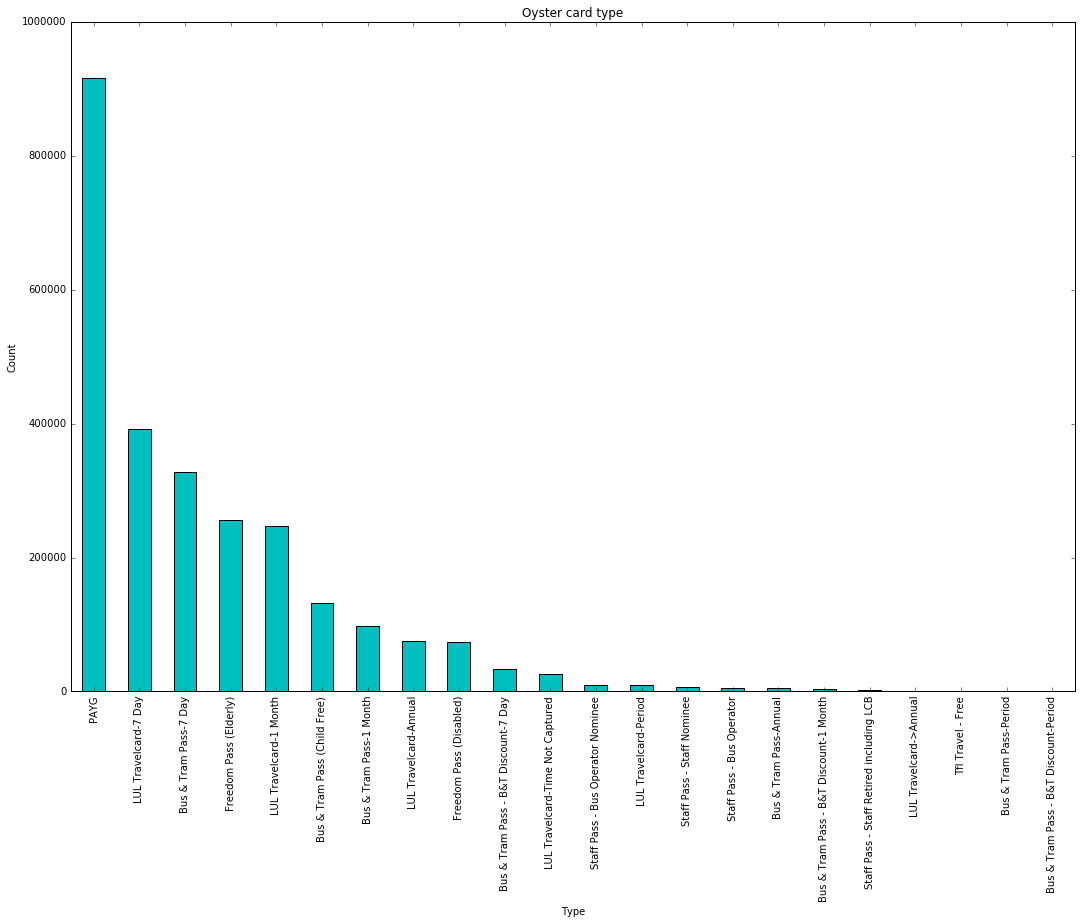

In [13]:
data["FinalProduct"].value_counts().plot.bar(figsize=(18, 12), color="c")

plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Oyster card type")
plt.show()

### Oyster card data - cleaning and filtering

Scope
- Only tube journeys are used out of all transpot modes.
- Unstarted and unfinished journeys are excluded.

In [14]:
data[(data["SubSystem"].str.contains("LUL")) & (data["StartStn"] != "Unstarted") & (data["EndStation"] != "Unfinished")]

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct
45989,2,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
45994,5,Thu,LUL,Preston Road,Northwood,1000,16:40,1024,17:04,Z0110,TKT,N,0,0,XX,Freedom Pass (Disabled)
45998,5,Thu,LUL,Holborn,Bounds Green,1000,16:40,1028,17:08,Z0104,TKT,N,0,0,XX,LUL Travelcard-Annual
46003,1,Sun,LUL,Earls Court,Pimlico,1000,16:40,1021,17:01,-------,PPY,N,160,160,XX,PAYG
46005,3,Tue,LUL,Victoria,Bethnal Green,1000,16:40,1027,17:07,Z0102,TKT,N,0,0,XX,LUL Travelcard-7 Day
46006,6,Fri,LUL/NR,Walthamstow Central,Arsenal,1000,16:40,1017,16:57,-------,PPY,N,55,55,XX,PAYG
46019,2,Mon,LUL,Highbury,Stratford,1000,16:40,1020,17:00,-------,PPY,N,110,110,XX,PAYG
46025,7,Sat,LUL,Embankment,Putney Bridge,1000,16:40,1026,17:06,-------,PPY,N,160,160,XX,PAYG
46029,4,Wed,LUL,Monument,Tufnell Park,1000,16:40,1031,17:11,-------,PPY,N,220,220,XX,PAYG
46031,5,Thu,LUL,South Kensington,Victoria,1000,16:40,1006,16:46,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)


In [15]:
data[(data["SubSystem"].str.contains("LUL")) & (data["StartStn"] != "Unstarted") & (data["EndStation"] != "Unfinished")].shape

(729220, 16)

Number of tube journey (i.e. number of rows) available for use after cleaning and filtering = 729,220

### Tube stations locations data set

Parse the KML file to get the station coordinates as Shapely Point objects.

In [16]:
from fastkml import kml

In [17]:
station_kml = kml.KML()
station_kml.from_string(open("data/stations.kml", "rb").read())

station_map = {}

doc = list(station_kml.features())[0]

for placemark in doc.features():
    station_name = placemark.name.strip().rstrip()
    station_coordinates = placemark.geometry
    station_map[station_name] = station_coordinates

print(station_map)

{'Shadwell Station': <shapely.geometry.point.Point object at 0x1160747f0>, 'Clapham Common Station': <shapely.geometry.point.Point object at 0x1160572b0>, 'Hyde Park Corner Station': <shapely.geometry.point.Point object at 0x1160637f0>, 'Blackwall Station': <shapely.geometry.point.Point object at 0x116084390>, 'Putney Bridge Station': <shapely.geometry.point.Point object at 0x11606f9b0>, 'Devons Road Station': <shapely.geometry.point.Point object at 0x116084a90>, 'Green Park Station': <shapely.geometry.point.Point object at 0x116060630>, 'Brixton Station': <shapely.geometry.point.Point object at 0x1160512b0>, 'Rotherhithe Station': <shapely.geometry.point.Point object at 0x1160741d0>, 'Mile End Station': <shapely.geometry.point.Point object at 0x116067c50>, 'Hornchurch Station': <shapely.geometry.point.Point object at 0x116063470>, 'Queensway Station': <shapely.geometry.point.Point object at 0x11606fb70>, 'Buckhurst Hill Station': <shapely.geometry.point.Point object at 0x116051390>, '

### Districts of Greater London data set

Parse the KML file to get the administrative boundaries of the 33 districts of the Greater London region (32 London boroughs and the City of London) as Shapely Polygon objects.

In [18]:
authority_kml = kml.KML()
authority_kml.from_string(open("data/County_and_Unitary_Authority_December_2015_Full_Extent_Boundaries_in_England_and_Wales.kml", "rb").read())

authority_map = {}

doc = list(authority_kml.features())[0]

for folder in doc.features():
    for placemark in folder.features():
        attr = {}
        for d in placemark.extended_data.elements[0].data:
            attr[d["name"]] = d["value"]
        authority_map[attr["CTYUA15NM"]] = placemark.geometry

print(authority_map)

{'Redcar and Cleveland': <shapely.geometry.polygon.Polygon object at 0x116094390>, 'Newham': <shapely.geometry.polygon.Polygon object at 0x1126ec3c8>, 'Norfolk': <shapely.geometry.polygon.Polygon object at 0x1126fca90>, 'Bradford': <shapely.geometry.polygon.Polygon object at 0x117e9f4e0>, 'Denbighshire': <shapely.geometry.polygon.Polygon object at 0x112709550>, 'Kingston upon Hull, City of': <shapely.geometry.polygon.Polygon object at 0x1160a6080>, 'York': <shapely.geometry.polygon.Polygon object at 0x1098ce5c0>, 'Hampshire': <shapely.geometry.multipolygon.MultiPolygon object at 0x1126f7cc0>, 'Herefordshire, County of': <shapely.geometry.polygon.Polygon object at 0x1098ce710>, 'West Berkshire': <shapely.geometry.polygon.Polygon object at 0x117e7c390>, 'Bath and North East Somerset': <shapely.geometry.polygon.Polygon object at 0x117e78940>, 'Worcestershire': <shapely.geometry.polygon.Polygon object at 0x112709a20>, 'East Sussex': <shapely.geometry.polygon.Polygon object at 0x1126f76d8>,

In [19]:
station_district_map = {}

for station in station_map:
    for district in authority_map:
        if station_map[station].within(authority_map[district]) == 1:
            station_district_map[station] = district

print(station_district_map)

{'Shadwell Station': 'Tower Hamlets', 'Warren Street Station': 'Camden', 'Clapham Common Station': 'Lambeth', 'Hyde Park Corner Station': 'Westminster', 'Blackwall Station': 'Tower Hamlets', 'Putney Bridge Station': 'Hammersmith and Fulham', 'Devons Road Station': 'Tower Hamlets', 'Green Park Station': 'Westminster', 'Brixton Station': 'Lambeth', 'Barbican Station': 'City of London', 'Mile End Station': 'Tower Hamlets', 'Queensway Station': 'Westminster', 'Buckhurst Hill Station': 'Essex', 'South Kensington Station': 'Kensington and Chelsea', 'Ladbroke Grove Station': 'Kensington and Chelsea', 'Brent Cross Station': 'Barnet', 'Oval Station': 'Lambeth', 'Grange Hill Station': 'Essex', 'Woodford Station': 'Redbridge', 'Warwick Avenue Station': 'Westminster', 'West India Quay Station': 'Tower Hamlets', 'Charing Cross Station': 'Westminster', 'Kew Gardens Station': 'Richmond upon Thames', 'Northfields Station': 'Ealing', 'Surrey Quays Station': 'Southwark', 'Archway Station': 'Islington', 